In [1]:
import pandas as pd
import numpy as np

In [2]:
films = pd.read_csv('./imdb.csv')
series = pd.read_csv('./imdb_series_original.csv')

In [3]:
films.head(10)

,number,title,year,rating
0,1.0,The Shawshank Redemption,-1994,9.3
1,2.0,The Godfather,-1972,9.2
2,3.0,The Dark Knight,-2008,9.0
3,4.0,The Godfather Part II,-1974,9.0
4,5.0,12 Angry Men,-1957,9.0
5,6.0,Schindler's List,-1993,9.0
6,7.0,The Lord of the Rings: The Return of the King,-2003,9.0
7,8.0,Pulp Fiction,-1994,8.9
8,9.0,The Lord of the Rings: The Fellowship of the Ring,-2001,8.8
9,10.0,"The Good, the Bad and the Ugly",-1966,8.8


In [4]:
series.head(10)

,posterColumn href,posterColumn src,titleColumn,titleColumn 2,secondaryInfo,ratingColumn
0,https://www.imdb.com/title/tt5491994/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMGZmYm...,1.0,Planet Earth II,(2016),9.4
1,https://www.imdb.com/title/tt0903747/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BYmQ4YW...,2.0,Breaking Bad,(2008),9.4
2,https://www.imdb.com/title/tt0795176/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMzMyYj...,3.0,Planet Earth,(2006),9.4
3,https://www.imdb.com/title/tt0185906/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BMTI3OD...,4.0,Band of Brothers,(2001),9.4
4,https://www.imdb.com/title/tt7366338/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BNTdkN2...,5.0,Chernobyl,(2019),9.3
5,https://www.imdb.com/title/tt0306414/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BNTllYz...,6.0,The Wire,(2002),9.3
6,https://www.imdb.com/title/tt0417299/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BODc5YT...,7.0,Avatar: The Last Airbender,(2005),9.2
7,https://www.imdb.com/title/tt6769208/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BNDZiND...,8.0,Blue Planet II,(2017),9.2
8,https://www.imdb.com/title/tt0141842/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BZGJjYz...,9.0,The Sopranos,(1999),9.2
9,https://www.imdb.com/title/tt2395695/?pf_rd_m=...,https://m.media-amazon.com/images/M/MV5BZTk5OT...,10.0,Cosmos: A Spacetime Odyssey,(2014),9.2


### data cleaning

In [5]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   number  250 non-null    float64
 1   title   250 non-null    object 
 2   year    250 non-null    int64  
 3   rating  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.9+ KB


In [6]:
films['year'] = films['year'].abs()

In [7]:
films.head()

,number,title,year,rating
0,1.0,The Shawshank Redemption,1994,9.3
1,2.0,The Godfather,1972,9.2
2,3.0,The Dark Knight,2008,9.0
3,4.0,The Godfather Part II,1974,9.0
4,5.0,12 Angry Men,1957,9.0


In [8]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   posterColumn href  250 non-null    object 
 1   posterColumn src   250 non-null    object 
 2   titleColumn        250 non-null    float64
 3   titleColumn 2      250 non-null    object 
 4   secondaryInfo      250 non-null    object 
 5   ratingColumn       250 non-null    float64
dtypes: float64(2), object(4)
memory usage: 11.8+ KB


In [9]:
series.drop(['posterColumn href', 'posterColumn src'], axis=1, inplace=True)

In [10]:
series.head()

,titleColumn,titleColumn 2,secondaryInfo,ratingColumn
0,1.0,Planet Earth II,(2016),9.4
1,2.0,Breaking Bad,(2008),9.4
2,3.0,Planet Earth,(2006),9.4
3,4.0,Band of Brothers,(2001),9.4
4,5.0,Chernobyl,(2019),9.3


In [11]:
series.rename(
    columns={
        'titleColumn': 'Number',
        'titleColumn 2': 'Title',
        'secondaryInfo': 'Year',
        'ratingColumn': 'Rating'
    },
    inplace=True
)

In [12]:
series.head()

,Number,Title,Year,Rating
0,1.0,Planet Earth II,(2016),9.4
1,2.0,Breaking Bad,(2008),9.4
2,3.0,Planet Earth,(2006),9.4
3,4.0,Band of Brothers,(2001),9.4
4,5.0,Chernobyl,(2019),9.3


In [13]:
series['Year'] = series['Year'].astype('string')

In [14]:
series['Year2'] = series['Year'].str.replace('(', '')

In [15]:
series.head()

,Number,Title,Year,Rating,Year2
0,1.0,Planet Earth II,(2016),9.4,2016)
1,2.0,Breaking Bad,(2008),9.4,2008)
2,3.0,Planet Earth,(2006),9.4,2006)
3,4.0,Band of Brothers,(2001),9.4,2001)
4,5.0,Chernobyl,(2019),9.3,2019)


In [16]:
series['Year2'] = series['Year2'].str.replace(')', '')

In [17]:
series.head()

,Number,Title,Year,Rating,Year2
0,1.0,Planet Earth II,(2016),9.4,2016
1,2.0,Breaking Bad,(2008),9.4,2008
2,3.0,Planet Earth,(2006),9.4,2006
3,4.0,Band of Brothers,(2001),9.4,2001
4,5.0,Chernobyl,(2019),9.3,2019


In [18]:
series['Year2'] = series['Year2'].astype('int')

In [19]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  250 non-null    float64
 1   Title   250 non-null    object 
 2   Year    250 non-null    string 
 3   Rating  250 non-null    float64
 4   Year2   250 non-null    int64  
dtypes: float64(2), int64(1), object(1), string(1)
memory usage: 9.9+ KB


### visualization

In [20]:
import matplotlib.pyplot as plt

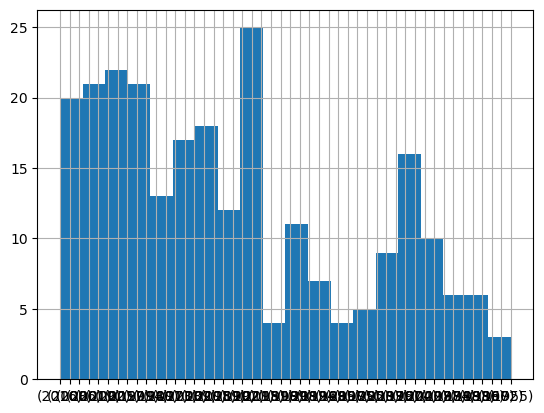

In [21]:
series['Year'].hist(bins=20);

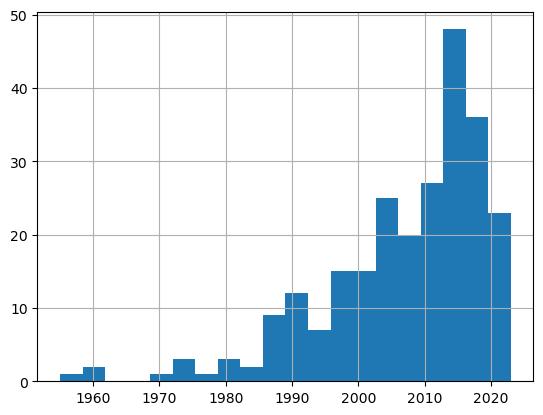

In [22]:
series['Year2'].hist(bins=20);

In [24]:
series2 = pd.read_csv('./Imdb_series_clean.csv')